In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def safelog(x):
    return np.log(x + 1e-100)

## Read Data

In [3]:
images = np.genfromtxt('hw03_data_set_images.csv',delimiter=',').reshape(5, 39, 320)
labels = np.char.strip(np.genfromtxt('hw03_data_set_labels.csv',delimiter=',',dtype=str),'"').reshape(5,39)

for index, key in enumerate(['A', 'B', 'C', 'D', 'E']):
    labels[labels == key] = index + 1
labels = labels.astype(int)

In [4]:
training_images = images[:,:25,:].reshape(125, 320)
training_l      = labels[:,:25].reshape(125,)
test_images     = images[:,25:,:].reshape(70, 320)
test_l          = labels[:,25:].reshape(70,)

K = np.max(training_l)
N_train = training_l.shape[0]
N_test = test_l.shape[0]


training_labels = np.zeros((N_train, K)).astype(int)
training_labels[range(N_train), training_l - 1] = 1

test_labels = np.zeros((N_test, K)).astype(int)
test_labels[range(N_test), test_l - 1] = 1

In [5]:
pcd = []
for i in range(5):
    pcd.append(np.sum(training_images[i*25:(i+1)*25], axis=0).flatten()/(training_images.shape[0]/K))

In [15]:
print("pcd[0] => ", pcd[0][:10], "...")
print("pcd[1] => ", pcd[1][:10], "...")
print("pcd[2] => ", pcd[2][:10], "...")
print("pcd[3] => ", pcd[3][:10], "...")
print("pcd[4] => ", pcd[4][:10], "...")

pcd[0] =>  [0.   0.   0.   0.04 0.04 0.04 0.16 0.2  0.16 0.12] ...
pcd[1] =>  [0.04 0.24 0.24 0.2  0.12 0.08 0.12 0.16 0.24 0.32] ...
pcd[2] =>  [0.   0.   0.   0.   0.   0.12 0.2  0.24 0.4  0.56] ...
pcd[3] =>  [0.12 0.44 0.4  0.16 0.12 0.08 0.08 0.08 0.12 0.08] ...
pcd[4] =>  [0.   0.12 0.12 0.08 0.12 0.16 0.12 0.04 0.12 0.12] ...


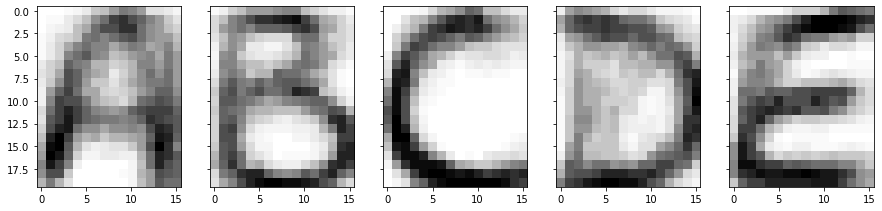

In [17]:
fig, axs = plt.subplots(1,5,figsize=(15,15), sharey=True)
for i in range(5):
    axs[i].imshow(pcd[i].reshape(16,20).T, cmap="Greys",interpolation='none')
plt.show()

In [8]:
def score_func(x, pcd):
    return [np.dot(x[i].T, safelog(pcd[c])) + np.dot((1-x[i].T), safelog(1 - pcd[c])) + safelog(0.2) for c in range(5)]


training_scores = np.zeros((125,5))
for i in range(125):
    training_scores[i] = score_func(training_images, pcd)

In [16]:
y_predicted = np.argmax(training_scores, axis = 1) + 1

confusion_matrix = pd.crosstab(y_predicted, np.sum(training_labels * np.array([1,2,3,4,5]), axis=1), rownames = ['y_predicted'], colnames = ['y_train'])
print("\n",confusion_matrix)
print("\n====================")
print("\n====================")


 y_train       1   2   3   4   5
y_predicted                    
1            25   0   0   0   0
2             0  24   1   0   1
3             0   0  24   0   0
4             0   1   0  25   0
5             0   0   0   0  24




In [10]:
test_scores = np.zeros((70,5))
for i in range(70):
    test_scores[i] = score_func(test_images, pcd)

y_predicted_test = np.argmax(test_scores, axis = 1) + 1

confusion_matrix = pd.crosstab(y_predicted_test, np.sum(test_labels * np.array([1,2,3,4,5]), axis=1), rownames = ['y_predicted'], colnames = ['y_test'])
print(confusion_matrix)

y_test       1   2  3   4   5
y_predicted                  
1            7   0  0   0   0
2            0  11  3   2   4
3            0   0  7   0   0
4            7   3  3  12   0
5            0   0  1   0  10
